In [1]:
# File: env.py
# Description: Building the environment-1 for the Mobile Robot to explore
# Agent - Mobile Robot
# Obstacles - 'road closed', 'trees', 'traffic lights', 'buildings'
# Environment: PyCharm and Anaconda environment
#
# MIT License
# Copyright (c) 2018 Valentyn N Sichkar
# github.com/sichkar-valentyn
#
# Reference to:
# Valentyn N Sichkar. Reinforcement Learning Algorithms for global path planning // GitHub platform. DOI: 10.5281/zenodo.1317899


# Importing libraries
import numpy as np  # To deal with data in form of matrices
import tkinter as tk  # To build GUI
import time  # Time is needed to slow down the agent and to see how he runs
from PIL import Image, ImageTk  # For adding images into the canvas widget

# Setting the sizes for the environment
pixels = 40   # pixels
env_height = 9  # grid height
env_width = 9  # grid width

# Global variable for dictionary with coordinates for the final route
a = {}


# Creating class for the environment
class Environment(tk.Tk, object):
    def __init__(self):
        super(Environment, self).__init__()
        self.action_space = ['up', 'down', 'left', 'right']
        self.n_actions = len(self.action_space)
        self.title('RL Q-learning. Sichkar Valentyn')
        self.geometry('{0}x{1}'.format(
            env_height * pixels, env_height * pixels))
        self.build_environment()

        # Dictionaries to draw the final route
        self.d = {}
        self.f = {}

        # Key for the dictionaries
        self.i = 0

        # Writing the final dictionary first time
        self.c = True

        # Showing the steps for longest found route
        self.longest = 0

        # Showing the steps for the shortest route
        self.shortest = 0

    # Function to build the environment
    def build_environment(self):
        self.canvas_widget = tk.Canvas(self,  bg='white',
                                       height=env_height * pixels,
                                       width=env_width * pixels)

        # Uploading an image for background
        # img_background = Image.open("images/bg.png")
        # self.background = ImageTk.PhotoImage(img_background)
        # # Creating background on the widget
        # self.bg = self.canvas_widget.create_image(0, 0, anchor='nw', image=self.background)

        # Creating grid lines
        for column in range(0, env_width * pixels, pixels):
            x0, y0, x1, y1 = column, 0, column, env_height * pixels
            self.canvas_widget.create_line(x0, y0, x1, y1, fill='grey')
        for row in range(0, env_height * pixels, pixels):
            x0, y0, x1, y1 = 0, row, env_height * pixels, row
            self.canvas_widget.create_line(x0, y0, x1, y1, fill='grey')

        # Creating objects of  Obstacles
        # Obstacle type 1 - road closed1
        img_obstacle1 = Image.open("images/road_closed1.png")
        self.obstacle1_object = ImageTk.PhotoImage(img_obstacle1)
        # Obstacle type 2 - tree1
        img_obstacle2 = Image.open("images/tree1.png")
        self.obstacle2_object = ImageTk.PhotoImage(img_obstacle2)
        # Obstacle type 3 - tree2
        img_obstacle3 = Image.open("images/tree2.png")
        self.obstacle3_object = ImageTk.PhotoImage(img_obstacle3)
        # Obstacle type 4 - building1
        img_obstacle4 = Image.open("images/building1.png")
        self.obstacle4_object = ImageTk.PhotoImage(img_obstacle4)
        # Obstacle type 5 - building2
        img_obstacle5 = Image.open("images/building2.png")
        self.obstacle5_object = ImageTk.PhotoImage(img_obstacle5)
        # Obstacle type 6 - road closed2
        img_obstacle6 = Image.open("images/road_closed2.png")
        self.obstacle6_object = ImageTk.PhotoImage(img_obstacle6)
        # Obstacle type 7 - road closed3
        img_obstacle7 = Image.open("images/road_closed3.png")
        self.obstacle7_object = ImageTk.PhotoImage(img_obstacle7)
        # Obstacle type 8 - traffic lights
        img_obstacle8 = Image.open("images/traffic_lights.png")
        self.obstacle8_object = ImageTk.PhotoImage(img_obstacle8)
        # Obstacle type 9 - pedestrian
        img_obstacle9 = Image.open("images/pedestrian.png")
        self.obstacle9_object = ImageTk.PhotoImage(img_obstacle9)
        # Obstacle type 10 - shop
        img_obstacle10 = Image.open("images/shop.png")
        self.obstacle10_object = ImageTk.PhotoImage(img_obstacle10)
        # Obstacle type 11 - bank1
        img_obstacle11 = Image.open("images/bank1.png")
        self.obstacle11_object = ImageTk.PhotoImage(img_obstacle11)
        # Obstacle type 12 - bank2
        img_obstacle12 = Image.open("images/bank2.png")
        self.obstacle12_object = ImageTk.PhotoImage(img_obstacle12)

        # Creating obstacles themselves
        # Obstacles from 1 to 22
        self.obstacle1 = self.canvas_widget.create_image(
            pixels * 3, pixels * 4, anchor='nw', image=self.obstacle2_object)
        # Obstacle 2
        self.obstacle2 = self.canvas_widget.create_image(
            0, pixels * 2, anchor='nw', image=self.obstacle6_object)
        # Obstacle 3
        self.obstacle3 = self.canvas_widget.create_image(
            pixels, 0, anchor='nw', image=self.obstacle5_object)
        # Obstacle 4
        self.obstacle4 = self.canvas_widget.create_image(
            pixels * 3, pixels * 2, anchor='nw', image=self.obstacle2_object)
        # Obstacle 5
        self.obstacle5 = self.canvas_widget.create_image(
            pixels * 4, 0, anchor='nw', image=self.obstacle12_object)
        # Obstacle 6
        self.obstacle6 = self.canvas_widget.create_image(
            pixels * 5, pixels * 3, anchor='nw', image=self.obstacle7_object)
        # Obstacle 7
        self.obstacle7 = self.canvas_widget.create_image(
            pixels * 7, pixels * 3, anchor='nw', image=self.obstacle9_object)
        # Obstacle 8
        self.obstacle8 = self.canvas_widget.create_image(
            pixels * 6, pixels, anchor='nw', image=self.obstacle10_object)
        # Obstacle 9
        self.obstacle9 = self.canvas_widget.create_image(
            pixels * 5, pixels * 5, anchor='nw', image=self.obstacle4_object)
        # Obstacle 10
        self.obstacle10 = self.canvas_widget.create_image(
            pixels * 6, pixels * 5, anchor='nw', image=self.obstacle4_object)
        # Obstacle 11
        self.obstacle11 = self.canvas_widget.create_image(
            pixels * 5, pixels * 6, anchor='nw', image=self.obstacle4_object)
        # Obstacle 12
        self.obstacle12 = self.canvas_widget.create_image(
            pixels * 5, pixels * 7, anchor='nw', image=self.obstacle4_object)
        # Obstacle 13
        self.obstacle13 = self.canvas_widget.create_image(
            0, pixels * 8, anchor='nw', image=self.obstacle3_object)
        # Obstacle 14
        self.obstacle14 = self.canvas_widget.create_image(
            pixels * 3, pixels * 7, anchor='nw', image=self.obstacle8_object)
        # Obstacle 15
        self.obstacle15 = self.canvas_widget.create_image(
            0, pixels * 4, anchor='nw', image=self.obstacle1_object)
        # Obstacle 16
        self.obstacle16 = self.canvas_widget.create_image(
            pixels * 8, 0, anchor='nw', image=self.obstacle3_object)
        # Obstacle 17
        self.obstacle17 = self.canvas_widget.create_image(
            pixels * 7, pixels * 7, anchor='nw', image=self.obstacle4_object)
        # Obstacle 18
        self.obstacle18 = self.canvas_widget.create_image(
            pixels, pixels * 6, anchor='nw', image=self.obstacle11_object)
        # Obstacle 19
        self.obstacle19 = self.canvas_widget.create_image(
            pixels * 8, pixels * 3, anchor='nw', image=self.obstacle8_object)
        # Obstacle 20
        self.obstacle20 = self.canvas_widget.create_image(
            pixels * 7, pixels * 6, anchor='nw', image=self.obstacle4_object)
        # Obstacle 21
        self.obstacle21 = self.canvas_widget.create_image(
            pixels * 7, pixels * 5, anchor='nw', image=self.obstacle4_object)
        # Obstacle 22
        self.obstacle22 = self.canvas_widget.create_image(
            pixels * 2, pixels * 3, anchor='nw', image=self.obstacle2_object)

        # Final Point
        img_flag = Image.open("images/flag.png")
        self.flag_object = ImageTk.PhotoImage(img_flag)
        self.flag = self.canvas_widget.create_image(
            pixels * 6, pixels * 6, anchor='nw', image=self.flag_object)

        # Uploading the image of Mobile Robot
        img_robot = Image.open("images/agent1.png")
        self.robot = ImageTk.PhotoImage(img_robot)

        # Creating an agent with photo of Mobile Robot
        self.agent = self.canvas_widget.create_image(
            0, 0, anchor='nw', image=self.robot)

        # Packing everything
        self.canvas_widget.pack()

    # Function to reset the environment and start new Episode
    def reset(self):
        self.update()
        # time.sleep(0.1)

        # Updating agent
        self.canvas_widget.delete(self.agent)
        self.agent = self.canvas_widget.create_image(
            0, 0, anchor='nw', image=self.robot)

        # # Clearing the dictionary and the i
        self.d = {}
        self.i = 0

        # Return observation
        return self.canvas_widget.coords(self.agent)

    # Function to get the next observation and reward by doing next step
    def step(self, action):
        # Current state of the agent
        state = self.canvas_widget.coords(self.agent)
        base_action = np.array([0, 0])

        # Updating next state according to the action
        # Action 'up'
        if action == 0:
            if state[1] >= pixels:
                base_action[1] -= pixels
        # Action 'down'
        elif action == 1:
            if state[1] < (env_height - 1) * pixels:
                base_action[1] += pixels
        # Action right
        elif action == 2:
            if state[0] < (env_width - 1) * pixels:
                base_action[0] += pixels
        # Action left
        elif action == 3:
            if state[0] >= pixels:
                base_action[0] -= pixels

        # Moving the agent according to the action
        self.canvas_widget.move(self.agent, base_action[0], base_action[1])

        # Writing in the dictionary coordinates of found route
        self.d[self.i] = self.canvas_widget.coords(self.agent)

        # Updating next state
        next_state = self.d[self.i]

        # Updating key for the dictionary
        self.i += 1

        # Calculating the reward for the agent
        if next_state == self.canvas_widget.coords(self.flag):
            reward = 1
            done = True
            next_state = 'goal'

            # Filling the dictionary first time
            if self.c == True:
                for j in range(len(self.d)):
                    self.f[j] = self.d[j]
                self.c = False
                self.longest = len(self.d)
                self.shortest = len(self.d)

            # Checking if the currently found route is shorter
            if len(self.d) < len(self.f):
                # Saving the number of steps for the shortest route
                self.shortest = len(self.d)
                # Clearing the dictionary for the final route
                self.f = {}
                # Reassigning the dictionary
                for j in range(len(self.d)):
                    self.f[j] = self.d[j]

            # Saving the number of steps for the longest route
            if len(self.d) > self.longest:
                self.longest = len(self.d)

        elif next_state in [self.canvas_widget.coords(self.obstacle1),
                            self.canvas_widget.coords(self.obstacle2),
                            self.canvas_widget.coords(self.obstacle3),
                            self.canvas_widget.coords(self.obstacle4),
                            self.canvas_widget.coords(self.obstacle5),
                            self.canvas_widget.coords(self.obstacle6),
                            self.canvas_widget.coords(self.obstacle7),
                            self.canvas_widget.coords(self.obstacle8),
                            self.canvas_widget.coords(self.obstacle9),
                            self.canvas_widget.coords(self.obstacle10),
                            self.canvas_widget.coords(self.obstacle11),
                            self.canvas_widget.coords(self.obstacle12),
                            self.canvas_widget.coords(self.obstacle13),
                            self.canvas_widget.coords(self.obstacle14),
                            self.canvas_widget.coords(self.obstacle15),
                            self.canvas_widget.coords(self.obstacle16),
                            self.canvas_widget.coords(self.obstacle17),
                            self.canvas_widget.coords(self.obstacle18),
                            self.canvas_widget.coords(self.obstacle19),
                            self.canvas_widget.coords(self.obstacle20),
                            self.canvas_widget.coords(self.obstacle21),
                            self.canvas_widget.coords(self.obstacle22)]:
            reward = -1
            done = True
            next_state = 'obstacle'

            # Clearing the dictionary and the i
            self.d = {}
            self.i = 0

        else:
            reward = 0
            done = False

        return next_state, reward, done

    # Function to refresh the environment
    def render(self):
        # time.sleep(0.03)
        self.update()

    # Function to show the found route
    def final(self):
        # Deleting the agent at the end
        self.canvas_widget.delete(self.agent)

        # Showing the number of steps
        print('The shortest route:', self.shortest)
        print('The longest route:', self.longest)

        # Creating initial point
        origin = np.array([20, 20])
        self.initial_point = self.canvas_widget.create_oval(
            origin[0] - 5, origin[1] - 5,
            origin[0] + 5, origin[1] + 5,
            fill='blue', outline='blue')

        # Filling the route
        for j in range(len(self.f)):
            # Showing the coordinates of the final route
            print(self.f[j])
            self.track = self.canvas_widget.create_oval(
                self.f[j][0] + origin[0] - 5, self.f[j][1] + origin[0] - 5,
                self.f[j][0] + origin[0] + 5, self.f[j][1] + origin[0] + 5,
                fill='blue', outline='blue')
            # Writing the final route in the global variable a
            a[j] = self.f[j]


# Returning the final dictionary with route coordinates
# Then it will be used in agent_brain.py
def final_states():
    return a


# This we need to debug the environment
# If we want to run and see the environment without running full algorithm
if __name__ == '__main__':
    env = Environment()
    env.mainloop()


In [3]:
# Description: Creating brain for the agent based on the Q-learning
# Environment: PyCharm and Anaconda environment
#
# MIT License
# Copyright (c) 2018 Valentyn N Sichkar
# github.com/sichkar-valentyn
#
# Reference to:
# Valentyn N Sichkar. Reinforcement Learning Algorithms for global path planning // GitHub platform. DOI: 10.5281/zenodo.1317899


# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Importing function from the env.py

# Creating class for the Q-learning table
class QLearningTable:
    def __init__(self, actions, learning_rate=0.01, reward_decay=0.9, e_greedy=0.9):
        # List of actions
        self.actions = actions
        # Learning rate
        self.lr = learning_rate
        # Value of gamma
        self.gamma = reward_decay
        # Value of epsilon
        self.epsilon = e_greedy
        # Creating full Q-table for all cells
        self.q_table = pd.DataFrame(columns=self.actions, dtype=np.float64)
        # Creating Q-table for cells of the final route
        self.q_table_final = pd.DataFrame(
            columns=self.actions, dtype=np.float64)

    # Function for choosing the action for the agent
    def choose_action(self, observation):
        # Checking if the state exists in the table
        self.check_state_exist(observation)
        # Selection of the action - 90 % according to the epsilon == 0.9
        # Choosing the best action
        if np.random.uniform() < self.epsilon:
            state_action = self.q_table.loc[observation, :]
            state_action = state_action.reindex(
                np.random.permutation(state_action.index))
            action = state_action.idxmax()
        else:
            # Choosing random action - left 10 % for choosing randomly
            action = np.random.choice(self.actions)
        return action

    # Function for learning and updating Q-table with new knowledge
    def learn(self, state, action, reward, next_state):
        # Checking if the next step exists in the Q-table
        self.check_state_exist(next_state)

        # Current state in the current position
        q_predict = self.q_table.loc[state, action]

        # Checking if the next state is free or it is obstacle or goal
        if next_state != 'goal' or next_state != 'obstacle':
            q_target = reward + self.gamma * \
                self.q_table.loc[next_state, :].max()
        else:
            q_target = reward

        # Updating Q-table with new knowledge
        self.q_table.loc[state, action] += self.lr * (q_target - q_predict)

        return self.q_table.loc[state, action]

    # Adding to the Q-table new states
    def check_state_exist(self, state):
        if state not in self.q_table.index:
            self.q_table = self.q_table.append(
                pd.Series(
                    [0]*len(self.actions),
                    index=self.q_table.columns,
                    name=state,
                )
            )

    # Printing the Q-table with states
    def print_q_table(self):
        # Getting the coordinates of final route from env.py
        e = final_states()

        # Comparing the indexes with coordinates and writing in the new Q-table values
        for i in range(len(e)):
            state = str(e[i])  # state = '[5.0, 40.0]'
            # Going through all indexes and checking
            for j in range(len(self.q_table.index)):
                if self.q_table.index[j] == state:
                    self.q_table_final.loc[state,
                                           :] = self.q_table.loc[state, :]

        print()
        print('Length of final Q-table =', len(self.q_table_final.index))
        print('Final Q-table with values from the final route:')
        print(self.q_table_final)

        print()
        print('Length of full Q-table =', len(self.q_table.index))
        print('Full Q-table:')
        print(self.q_table)

    # Plotting the results for the number of steps
    def plot_results(self, steps, cost):
        #
        f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
        #
        ax1.plot(np.arange(len(steps)), steps, 'b')
        ax1.set_xlabel('Episode')
        ax1.set_ylabel('Steps')
        ax1.set_title('Episode via steps')

        #
        ax2.plot(np.arange(len(cost)), cost, 'r')
        ax2.set_xlabel('Episode')
        ax2.set_ylabel('Cost')
        ax2.set_title('Episode via cost')

        plt.tight_layout()  # Function to make distance between figures

        #
        plt.figure()
        plt.plot(np.arange(len(steps)), steps, 'b')
        plt.title('Episode via steps')
        plt.xlabel('Episode')
        plt.ylabel('Steps')

        #
        plt.figure()
        plt.plot(np.arange(len(cost)), cost, 'r')
        plt.title('Episode via cost')
        plt.xlabel('Episode')
        plt.ylabel('Cost')

        # Showing the plots
        plt.show()


In [4]:
# File: run_agent.py
# Description: Running algorithm
# Environment: PyCharm and Anaconda environment
#
# MIT License
# Copyright (c) 2018 Valentyn N Sichkar
# github.com/sichkar-valentyn
#
# Reference to:
# Valentyn N Sichkar. Reinforcement Learning Algorithms for global path planning // GitHub platform. DOI: 10.5281/zenodo.1317899


# Importing classes
from env import Environment
from agent_brain import QLearningTable


def update():
    # Resulted list for the plotting Episodes via Steps
    steps = []

    # Summed costs for all episodes in resulted list
    all_costs = []

    for episode in range(1000):
        # Initial Observation
        observation = env.reset()

        # Updating number of Steps for each Episode
        i = 0

        # Updating the cost for each episode
        cost = 0

        while True:
            # Refreshing environment
            env.render()

            # RL chooses action based on observation
            action = RL.choose_action(str(observation))

            # RL takes an action and get the next observation and reward
            observation_, reward, done = env.step(action)

            # RL learns from this transition and calculating the cost
            cost += RL.learn(str(observation), action,
                             reward, str(observation_))

            # Swapping the observations - current and next
            observation = observation_

            # Calculating number of Steps in the current Episode
            i += 1

            # Break while loop when it is the end of current Episode
            # When agent reached the goal or obstacle
            if done:
                steps += [i]
                all_costs += [cost]
                break

    # Showing the final route
    env.final()

    # Showing the Q-table with values for each action
    RL.print_q_table()

    # Plotting the results
    RL.plot_results(steps, all_costs)

The shortest route: 16
The longest route: 136
[0.0, 40.0]
[40.0, 40.0]
[40.0, 80.0]
[40.0, 120.0]
[40.0, 160.0]
[80.0, 160.0]
[80.0, 200.0]
[120.0, 200.0]
[120.0, 240.0]
[160.0, 240.0]
[160.0, 280.0]
[160.0, 320.0]
[200.0, 320.0]
[240.0, 320.0]
[240.0, 280.0]
[240.0, 240.0]

Length of final Q-table = 15
Final Q-table with values from the final route:
                           0             1             2             3
[0.0, 40.0]     1.248503e-07 -4.473165e-01  2.414996e-05  4.347503e-07
[40.0, 40.0]   -4.303988e-01  7.504088e-05  3.307758e-09  5.859596e-07
[40.0, 80.0]    2.834287e-07  2.317079e-04  3.055686e-08 -2.143219e-01
[40.0, 120.0]   3.640487e-06  6.787260e-04 -2.894468e-01  1.074412e-07
[40.0, 160.0]   9.709802e-06  2.405252e-07  1.950769e-03 -1.046617e-01
[80.0, 160.0]  -1.570568e-01  5.036298e-03 -1.654862e-01  5.747928e-05
[80.0, 200.0]   7.045378e-05  6.091884e-05  1.268702e-02  1.750829e-07
[120.0, 200.0] -1.046617e-01  2.936902e-02  1.353571e-04  2.931341e-04
[120.0, 

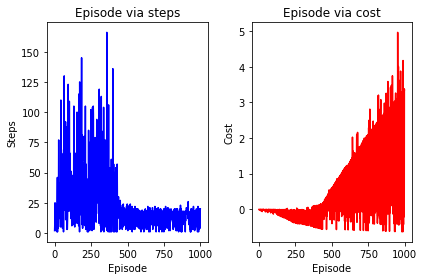

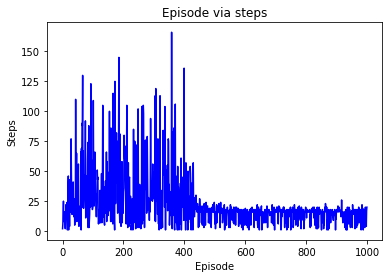

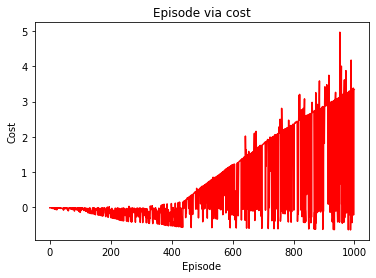

In [ ]:
# Commands to be implemented after running this file
if __name__ == "__main__":
    # Calling for the environment
    env = Environment()
    # Calling for the main algorithm
    RL = QLearningTable(actions=list(range(env.n_actions)))
    # Running the main loop with Episodes by calling the function update()
    env.after(100, update)  # Or just update()
    env.mainloop()

In [ ]:
q_table